# Credit Risk Resampling Techniques

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score

from imblearn.metrics import classification_report_imbalanced

from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

from imblearn.metrics import classification_report_imbalanced

from imblearn.under_sampling import RandomUnderSampler

from imblearn.under_sampling import ClusterCentroids

from imblearn.combine import SMOTEENN

from imblearn.metrics import geometric_mean_score

from sklearn.metrics import precision_recall_fscore_support

# Read the CSV into DataFrame

In [3]:
# Load the data
file_path = Path('lending_data.csv')
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


# Split the Data into Training and Testing

In [4]:
# we probably need to get dummies for homeowner status - otherwise it's meaningless - i **think** this should be done ahead 
# of test train split

le = LabelEncoder()

le.fit(df["homeowner"])
df["homeowner"] = le.transform(df["homeowner"])



df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,1,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,1,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,2,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,1,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,0,53000,0.433962,5,1,23000,low_risk


In [5]:

y = df["loan_status"]
X = df.drop(columns="loan_status")





In [6]:
X.describe()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,0.606144,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,0.667811,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,0.000000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,0.000000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,1.000000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,1.000000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,2.000000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [7]:
# Check the balance of our target values
#y['loan_status'].value_counts()
y.value_counts()


low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [8]:
# Create X_train, X_test, y_train, y_test
# YOUR CODE HERE



X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [9]:
# Create the StandardScaler instance

# YOUR CODE HERE

scaler = StandardScaler()



In [10]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
# YOUR CODE HERE
X_scaler = scaler.fit(X_train)




In [11]:
# Scale the training and testing data
# YOUR CODE HERE

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Simple Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [13]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.9892813049736127

In [14]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  615,    10],
       [  102, 18657]], dtype=int64)

In [15]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.86      0.98      0.99      0.92      0.99      0.98       625
   low_risk       1.00      0.99      0.98      1.00      0.99      0.98     18759

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     19384



In [16]:
precision_recall_fscore_support(y_test, y_pred, average='macro')[1]

0.9892813049736127

# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [17]:
# Resample the training data with the RandomOversampler
# YOUR CODE HERE
ros = RandomOverSampler(random_state=1)
X_resampled_1, y_resampled_1 = ros.fit_resample(X_train_scaled, y_train)



# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_resampled_1)

Counter({'low_risk': 56277, 'high_risk': 56277})

In [18]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE
model_1 = LogisticRegression(solver='lbfgs', random_state=1)
model_1.fit(X_resampled_1, y_resampled_1)


LogisticRegression(random_state=1)

In [19]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

y_pred_1 = model_1.predict(X_test_scaled)


balanced_accuracy_score(y_test, y_pred_1)

0.9946414201183431

In [20]:
# Display the confusion matrix
# YOUR CODE HERE

confusion_matrix(y_test, y_pred_1)

array([[  622,     3],
       [  111, 18648]], dtype=int64)

In [21]:
# Print the imbalanced classification report
# YOUR CODE HERE



print(classification_report_imbalanced(y_test, y_pred_1))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



### SMOTE Oversampling

In [22]:
# Resample the training data with SMOTE
# YOUR CODE HERE

X_resampled_2, y_resampled_2 = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(
    X_train_scaled, y_train
)

# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_resampled_2)

Counter({'low_risk': 56277, 'high_risk': 56277})

In [23]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

model_2 = LogisticRegression(solver='lbfgs', random_state=1)
model_2.fit(X_resampled_2, y_resampled_2)

LogisticRegression(random_state=1)

In [47]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

y_pred_2 = model_2.predict(X_test_scaled)


balanced_accuracy_score(y_test, y_pred_2)

0.9946414201183431

In [25]:
# Display the confusion matrix
# YOUR CODE HERE

confusion_matrix(y_test, y_pred_2)

array([[  622,     3],
       [  111, 18648]], dtype=int64)

In [26]:
# Print the imbalanced classification report
# YOUR CODE HERE


print(classification_report_imbalanced(y_test, y_pred_2))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [27]:
# Resample the data using the ClusterCentroids resampler
# YOUR CODE HERE

cc = ClusterCentroids(random_state=1)
X_resampled_3, y_resampled_3 = cc.fit_resample(X_train_scaled, y_train)

# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_resampled_3)

Counter({'high_risk': 1875, 'low_risk': 1875})

In [28]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE
model_3 = LogisticRegression(solver='lbfgs', random_state=1)
model_3.fit(X_resampled_3, y_resampled_3)

LogisticRegression(random_state=1)

In [29]:
# Calculate the balanced accuracy score
# YOUR CODE HERE
y_pred_3 = model_3.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_3)

0.9932813049736127

In [30]:
# Display the confusion matrix
# YOUR CODE HERE

confusion_matrix(y_test, y_pred_3)

array([[  620,     5],
       [  102, 18657]], dtype=int64)

In [31]:
# Print the imbalanced classification report
# YOUR CODE HERE

print(classification_report_imbalanced(y_test, y_pred_3))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.86      0.99      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18759

avg / total       1.00      0.99      0.99      0.99      0.99      0.99     19384



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [32]:
# Resample the training data with SMOTEENN
# YOUR CODE HERE

sm = SMOTEENN(random_state=1)
X_resampled_4, y_resampled_4 = sm.fit_resample(X_train_scaled, y_train)
# View the count of target classes with Counter
# YOUR CODE HERE

Counter(y_resampled_4)



Counter({'high_risk': 55667, 'low_risk': 55917})

In [33]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

model_4 = LogisticRegression(solver='lbfgs', random_state=1)
model_4.fit(X_resampled_4, y_resampled_4)

LogisticRegression(random_state=1)

In [34]:
# Calculate the balanced accuracy score
# YOUR CODE HERE
y_pred_4 = model_4.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred_4)

0.9946414201183431

In [35]:
# Display the confusion matrix
# YOUR CODE HERE

confusion_matrix(y_test, y_pred_4)

array([[  622,     3],
       [  111, 18648]], dtype=int64)

In [36]:
# Print the imbalanced classification report
# YOUR CODE HERE

print(classification_report_imbalanced(y_test, y_pred_4))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



# Final Questions

1. Which model had the best balanced accuracy score?

   YOUR ANSWER HERE.

2. Which model had the best recall score?

    YOUR ANSWER HERE.

3. Which model had the best geometric mean score?

    YOUR ANSWER HERE.


In [37]:
accuracy_scores = {'simple_logistic': [0.9543211898288821], 'naive_random_oversampling': [0.994748035609574], 'smote_oversampling': [0.9948279972279972], 
                   'undersampling': [0.9828813049736127], 'combination_sampling':[0.994748035609574]} 

In [38]:
accuracy_frame = pd.DataFrame(accuracy_scores)


Bad key "text.kerning_factor" on line 4 in
C:\Users\Sean\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


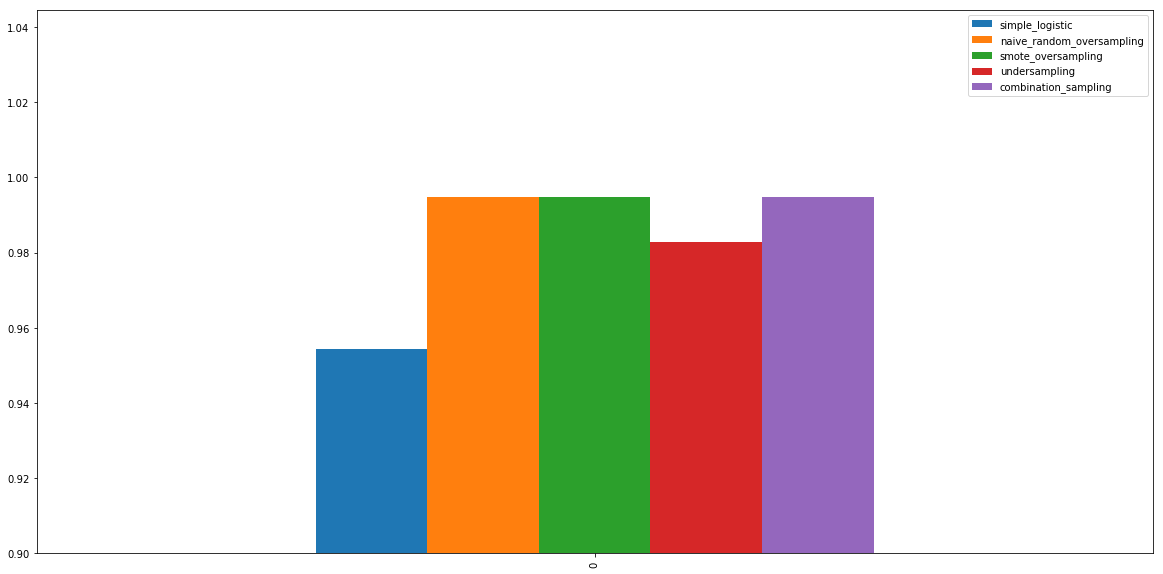

In [39]:
accuracy_frame.plot(kind = 'bar',ylim =.9,figsize = (20,10))

1.)  It appears that SMOTE oversampling, naive sampling, and combination sampling have the highest (equal?) accuracy.  I re-checked this and it seems to be functioning properly, so I'm not sure if equal is correct for this.  

In [40]:
recall_scores = {'simple_logistic': [precision_recall_fscore_support(y_test, y_pred, average='macro')[1]], 'naive_random_oversampling': [precision_recall_fscore_support(y_test, y_pred_1, average='macro')[1]], 
                                   'smote_oversampling': [precision_recall_fscore_support(y_test, y_pred_2, average='macro')[1]],
                                   'undersampling': [precision_recall_fscore_support(y_test, y_pred_3, average='macro')[1]], 'combination_sampling':[precision_recall_fscore_support(y_test, y_pred_4, average='macro')[1]]} 

In [41]:
recall_df = pd.DataFrame(recall_scores)

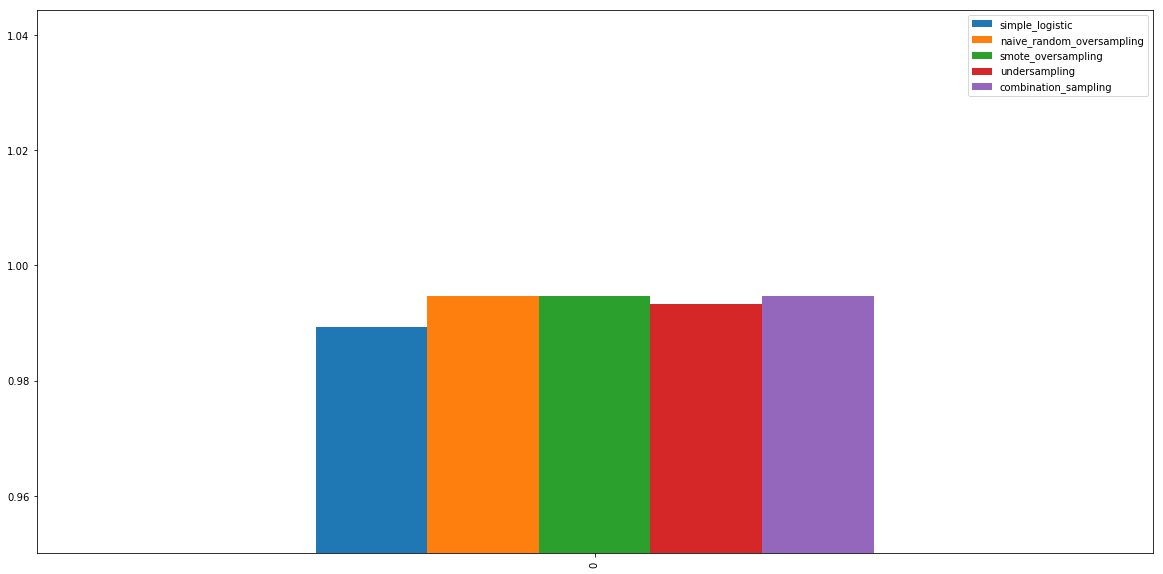

In [42]:
recall_df.plot(kind = 'bar',ylim =.95,figsize = (20,10))

In [43]:
recall_df.iloc[0,:].max()

0.9946414201183431

2.)  It appears - again - that smote, combination, and naive have the same recall scores.  This again seems odd.  I seem to be feeding the right data to the algoritms.  I'm not sure this would be the case with different methods? Will see in HW answers.

In [44]:
f1_scores = {'simple_logistic': [precision_recall_fscore_support(y_test, y_pred, average='macro')[2]], 'naive_random_oversampling': [precision_recall_fscore_support(y_test, y_pred_1, average='macro')[2]], 
                                   'smote_oversampling': [precision_recall_fscore_support(y_test, y_pred_2, average='macro')[2]],
                                   'undersampling': [precision_recall_fscore_support(y_test, y_pred_3, average='macro')[2]], 'combination_sampling':[precision_recall_fscore_support(y_test, y_pred_4, average='macro')[2]]} 

In [45]:
f1_df = pd.DataFrame(recall_scores)

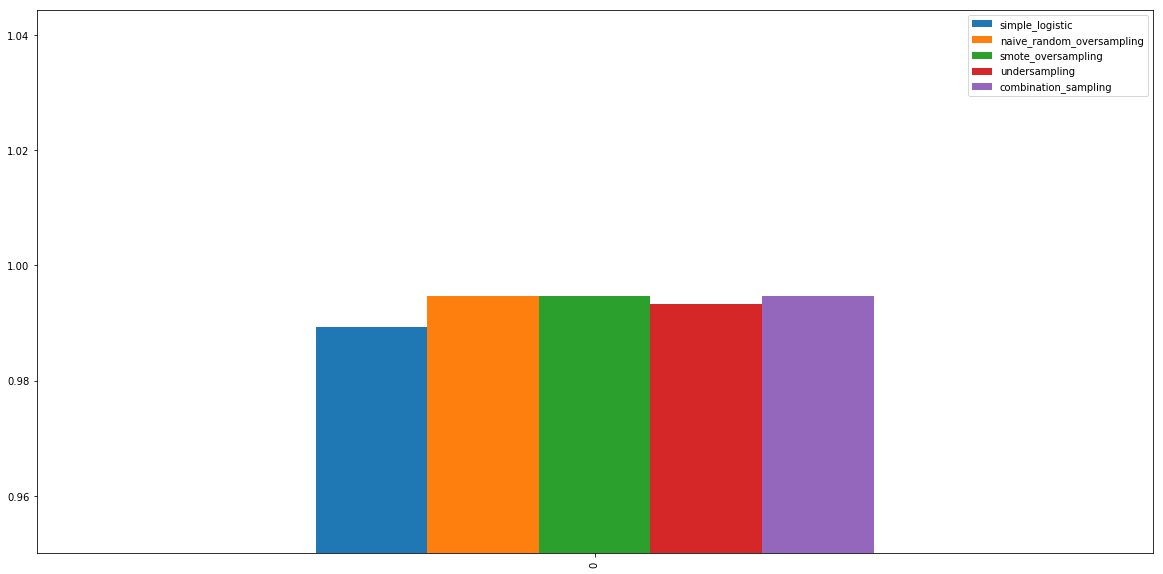

In [46]:
f1_df.plot(kind = 'bar',ylim =.95,figsize = (20,10))

3.)  Again, smote, combo, and naive appear to have the best geometric mean/f1 scores.